In [1]:
import pandas as pd

# load cleaned data
reviews = pd.read_csv('../Data/clean_data.csv')

reviews.head()

,ab,abandoned,abd,abduction,abililty,ability,abit,able,abouit,abounding,...,yuk,yum,yummy,zenit,zentrum,zero,zieglergasse,zipped,zone,Reviewer_Score
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
features = reviews.iloc[:,:reviews.shape[1]-1]
features.head()

,ab,abandoned,abd,abduction,abililty,ability,abit,able,abouit,abounding,...,yuck,yuk,yum,yummy,zenit,zentrum,zero,zieglergasse,zipped,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
labels = reviews.iloc[:, reviews.shape[1]-1]
labels.head()

0    1
1    1
2    0
3    1
4    0
Name: Reviewer_Score, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

#features_train, features_test, labels_train, labels_test = train_test_split(features.values, labels.values, test_size=0.33, random_state=47)

In [4]:
def test_model(model, f_feature, t_feature, f_label, t_label):
    model.fit(f_feature, f_label)
    pred = model.predict(t_feature)
    confusion_matrix = metrics.confusion_matrix(t_label, pred)
    TPR = confusion_matrix[0][0] /  (confusion_matrix[0][0] + confusion_matrix[1][0])
    TNR = confusion_matrix[1][1] /  (confusion_matrix[1][1] + confusion_matrix[0][1])
    print(metrics.confusion_matrix(t_label, pred))
    print(metrics.f1_score(t_label, pred))
    return [metrics.accuracy_score(t_label, pred),
               metrics.roc_auc_score(t_label, pred),
               metrics.f1_score(t_label, pred), TPR, TNR]
    
    
def acc_score(t_label, pred):
    print('Accuracy is ' + str(metrics.accuracy_score(t_label, pred)))

def auc_score(t_label, pred):
    print('AUC score is ' + str(metrics.roc_auc_score(t_label, pred)))


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import numpy as np
import matplotlib.pyplot as plt


In [7]:
#fit model on new matrix
#obtain metrics for model
models = []
model_names = []
models.append(LogisticRegression(C = 0.1, class_weight ='balanced'))
model_names.append('current best')
# models.append(LogisticRegression())
# model_names.append('base')
# models.append(LogisticRegression(class_weight ='balanced'))
# model_names.append('classweight balanced')
# models.append(LogisticRegression(solver ='sag'))
# model_names.append('solver sag')
# models.append(LogisticRegression(solver ='saga'))
# model_names.append('solver saga')
# models.append(LogisticRegression(solver ='newton-cg'))
# model_names.append('solver newton-cg')



In [8]:
performance = [test_model(model, features_train, features_test, labels_train, labels_test) for model in models]
acc = [perf[0] for perf in performance]
auc = [perf[1] for perf in performance]
f1 = [perf[2] for perf in performance]
print(performance[0])

[[608 218]
 [189 635]]
0.7573047107930829
[0.7533333333333333, 0.7533542749006794, 0.7573047107930829]


In [9]:
print([auc[i] + f1[i] for i in range(len(models))])

[1.5106589856937624]


<BarContainer object of 1 artists>

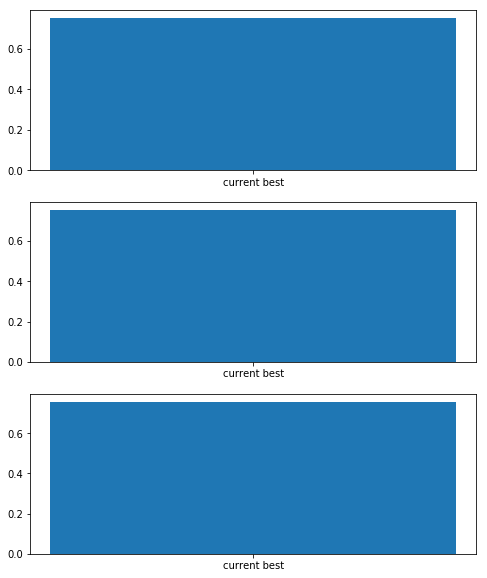

In [10]:
fig = plt.subplots(figsize=(8, 10))
plt.subplot(311)
plt.bar(model_names, height=acc)
plt.subplot(312)
plt.bar(model_names, height=auc)
plt.subplot(313)
plt.bar(model_names, height=f1)

In [11]:
from sklearn.ensemble import VotingClassifier

model_tuples = [(model_names[i], models[i]) for i in range(len(models))]
ensemble = VotingClassifier(model_tuples)
print(test_model(ensemble, features_train, features_test, labels_train, labels_test))

C:\Users\Thuan\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[[608 218]
 [189 635]]
0.7573047107930829
[0.7533333333333333, 0.7533542749006794, 0.7573047107930829]


C:\Users\Thuan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [12]:
log_model = models[0]
log_model.coef_.shape

(1, 7152)

In [13]:


words = reviews.columns[: reviews.shape[1]-1]
coef = log_model.coef_.transpose()
#coef = [abs(x)[0] for x in coef]

word_importance = pd.DataFrame()
word_importance['word'] = words
word_importance['coef'] = coef

word_importance = word_importance.sort_values(by=['coef'], ascending = False)

word_importance.head()

,word,coef
2247,excellent,0.954532
2394,fantastic,0.855119
3709,lovely,0.796164
230,amazing,0.717034
4545,perfect,0.715676


In [14]:
words_wanted = 10
total_words = word_importance.shape[0]

most_positive = word_importance.iloc[:words_wanted].values
positive_word = [x[0] for x in most_positive]
postive_score = [x[1] for x in most_positive]


most_negative = word_importance.iloc[total_words-words_wanted:].sort_values(by='coef').values
print(type(most_negative))
negative_word = [x[0] for x in most_negative]
negative_score = [abs(x[1]) for x in most_negative]


<class 'numpy.ndarray'>


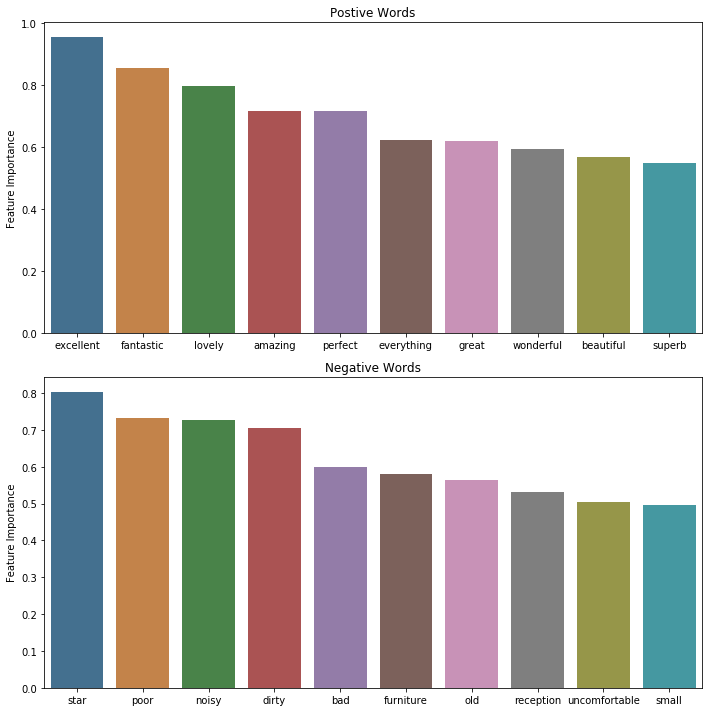

In [15]:
import seaborn as sns


fig = plt.subplots(figsize=(10, 10))
plt.subplot(211)
sns.barplot(x=positive_word, y=postive_score, saturation=.5)
plt.title('Postive Words')
plt.ylabel('Feature Importance')
plt.subplot(212)
plt.title('Negative Words')
plt.ylabel('Feature Importance')
sns.barplot(x=negative_word, y=negative_score, saturation=.5)
plt.tight_layout()

fig_path = '../export/'
plt.savefig(fig_path + 'linear_reg_most_important_words', fmt = 'png', dpi = 100)

plt.show()


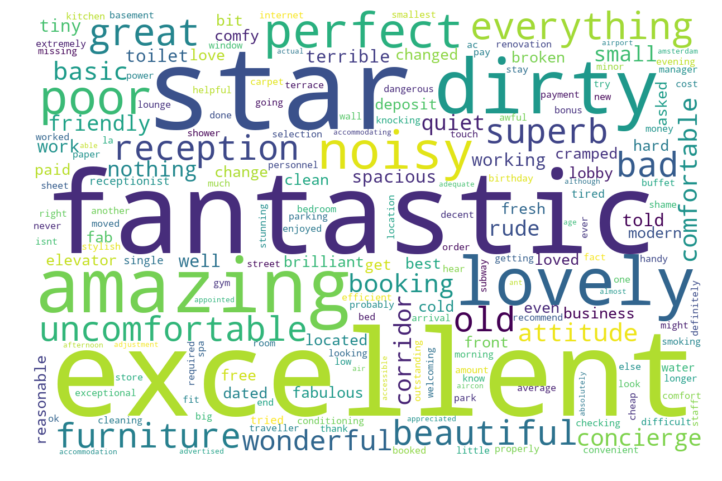

In [16]:
from wordcloud import WordCloud


# load cleaned data
reviews = pd.read_csv('../Data/simple_clean_data.csv')

only_pos_coef = []
for x in coef:
    scaled_freq = abs(x)
    scaled_freq = scaled_freq * 10
    scaled_freq = int(scaled_freq)
    if scaled_freq > 0:
        only_pos_coef.append(scaled_freq)
    else:
        only_pos_coef.append(0)

freq = dict(zip(words, only_pos_coef))

wordcloud = WordCloud(width=1200, height=800, background_color="white").generate_from_frequencies(freq)

plt.figure(figsize=[12,9])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# from sklearn.svm import SVC

# SVM_clf_1 = SVC(C = 0.1, gamma = 1.0)
# SVM_clf_2 = SVC(C = 1.0, gamma = 1.0, class_weight = None)
# SVM_clf_3 = SVC(C = 1.0, gamma = 1.0, class_weight='balanced')



# SVM_clf_3.fit(features_train, labels_train)


# test_model(SVM_clf_1, features_train, labels_train, features_test, labels_test)
# test_model(SVM_clf_2, features_train, labels_train, features_test, labels_test)
# test_model(SVM_clf_3, features_train, labels_train, features_test, labels_test)
# test_model(log_model, features_train, labels_train, features_test, labels_test)

In [10]:
import pandas as pd

proportions = [x/10 for x in range(1,10)]
proportions

dfs = [pd.read_csv("../data/clean_data_" + str(proportion) + ".csv") for proportion in proportions]

In [11]:
dfs[3].head()

,aa,aaaa,abandoned,abbey,abd,ability,abit,able,abnormal,aboundant,...,zen,zero,ziggo,zimmer,zip,zone,zoo,zoom,zuid,Reviewer_Score
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
def split_data(reviews):
    features = reviews.iloc[:,:reviews.shape[1]-1]
    labels = reviews.iloc[:, reviews.shape[1]-1]
    return train_test_split(features.values, labels.values, test_size=0.33)



In [16]:


split_results = [split_data(df) for df in dfs]

features_trains = [x[0] for x in split_results] 
features_tests = [x[1] for x in split_results] 
labels_trains = [x[2] for x in split_results] 
labels_tests = [x[3] for x in split_results] 

In [17]:
performance = []
for i in range(0, len(proportions)):
    model = LogisticRegression(C = 0.1, class_weight ='balanced')
    performance.append(test_model(model, features_trains[i], features_tests[i], labels_trains[i], labels_tests[i]))
    
acc = [perf[0] for perf in performance]
auc = [perf[1] for perf in performance]
f1 = [perf[2] for perf in performance]
TPR = [perf[3] for perf in performance]
TNR = [perf[4] for perf in performance]

[[1238  257]
 [  44  111]]
0.4244741873804971
[[1090  249]
 [ 105  206]]
0.5378590078328982
[[874 272]
 [150 354]]
0.6265486725663717
[[746 272]
 [163 469]]
0.6831755280407866
[[636 213]
 [207 594]]
0.7388059701492539
[[466 189]
 [214 781]]
0.794910941475827
[[384 139]
 [217 910]]
0.8363970588235294
[[ 236  100]
 [ 269 1045]]
0.8499389995933307
[[  89   77]
 [ 222 1262]]
0.8940843074743181


In [18]:
labels_tests[8].sum()

1484

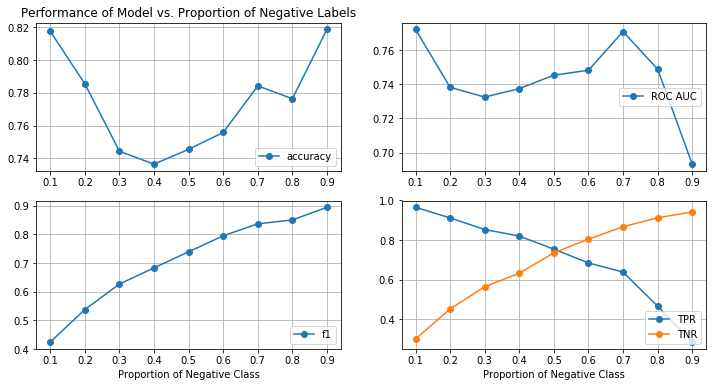

In [24]:
X = np.arange(len(proportions))


fig = plt.subplots(figsize=(12, 6))
plt.subplot(221)
plt.plot(proportions, acc, "o-",label="accuracy")
plt.title('Performance of Model vs. Proportion of Negative Labels')
plt.legend(loc=4)
plt.grid()
plt.subplot(222)
plt.plot(proportions, auc, "o-",label="ROC AUC")
plt.legend(loc=5)
plt.grid()
plt.subplot(223)
plt.plot(proportions, f1, "o-", label="f1")
plt.legend(loc=4)
plt.grid()
plt.xlabel("Proportion of Negative Class")
plt.subplot(224)
plt.plot(proportions, TPR, "o-", label="TPR")
plt.plot(proportions, TNR, "o-", label="TNR")
plt.legend(loc=4)
plt.grid()
plt.xlabel("Proportion of Negative Class")

fig_path = '../export/'
plt.savefig(fig_path + 'linear_reg_different_proportions', fmt = 'png', dpi = 100)

plt.show()